In [63]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

Data Collection and Processing

In [64]:
# loading the data
train_data= pd.read_csv('/content/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv', parse_dates=[0])

In [65]:
# print first 5 rows in the dataframe
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [66]:
train_data['Date'].dtype

dtype('<M8[ns]')

In [67]:
# print last 5 rows of the dataframe
train_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2188,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2189,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299
2190,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018
2191,2021-12-31,47169.371094,48472.527344,45819.953125,46306.445313,46306.445313,36974172400
2192,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004


In [68]:
train_data.shape

(2193, 7)

In [69]:
# getting some basic informations about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2193 non-null   datetime64[ns]
 1   Open       2193 non-null   float64       
 2   High       2193 non-null   float64       
 3   Low        2193 non-null   float64       
 4   Close      2193 non-null   float64       
 5   Adj Close  2193 non-null   float64       
 6   Volume     2193 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 120.1 KB


In [70]:
# checking the number of missing values
train_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [71]:
# getting the statistical measures of the data
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,13005.792871,13362.996536,12616.080147,13025.164563,13025.164563,1.757591e+10
std,16479.996404,16935.236723,15960.649705,16489.530523,16489.530523,2.085247e+10
min,365.072998,374.950012,354.914001,364.330994,364.330994,2.851400e+07
25%,2577.770020,2682.260010,2510.479980,2589.409912,2589.409912,1.182870e+09
50%,7397.134277,7535.716797,7233.399414,7397.796875,7397.796875,9.175292e+09
75%,11354.299805,11570.786133,11018.129883,11358.662109,11358.662109,2.886756e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [72]:
correlation = train_data.corr()

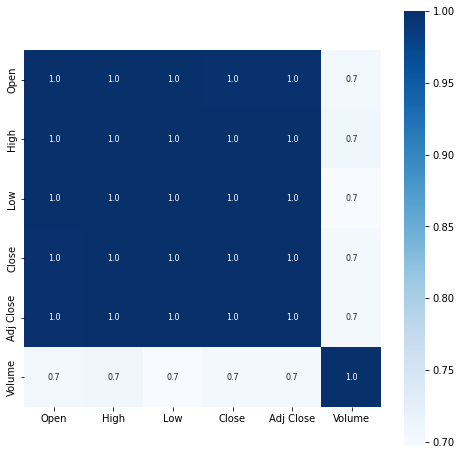

In [73]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

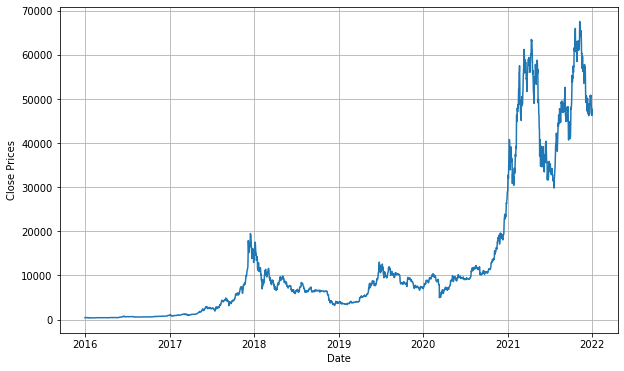

In [74]:
#plot Adj Close price
train_data.index = train_data['Date'] 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(train_data['Adj Close'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


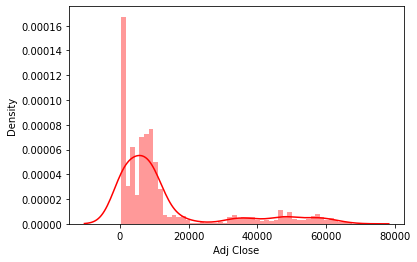

In [75]:
#distribution of Adj close
sns.distplot(train_data['Adj Close'], color = "red")

In [76]:
#Finding the duration of dataset
print("Starting date: ",train_data.iloc[0][0])
print("Ending date: ", train_data.iloc[-1][0])
print("Duration: ", train_data.iloc[-1][0]-train_data.iloc[0][0])

Starting date:  2016-01-01 00:00:00
Ending date:  2022-01-01 00:00:00
Duration:  2192 days 00:00:00


Visualization

In [77]:
Yr_2020 = train_data[(train_data['Date'] >= '2020-01-01') & (train_data['Date'] < '2021-01-01')]
Adj_close_2020= Yr_2020.groupby(Yr_2020['Date'].dt.strftime('%B'))[['Adj Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Adj_close_2020 = Adj_close_2020.reindex(new_order,axis=0)
Adj_close_2020

,Adj Close
Date,
January,8389.270476
February,9630.722185
March,6871.016113
April,7224.477328
May,9263.151745
June,9489.227214
July,9589.899729
August,11652.394185
September,10660.276856


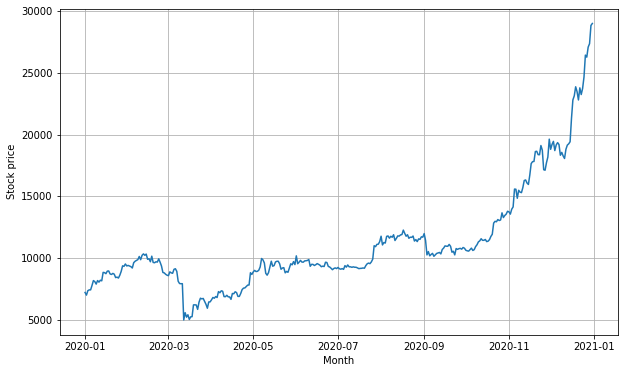

In [78]:
#stock analysis 2020
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Stock price')
plt.plot(Yr_2020['Adj Close'])
plt.show()

In [79]:
open_close_2020= Yr_2020.groupby(Yr_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
#new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
open_close_2020 = open_close_2020.reindex(new_order,axis=0)
open_close_2020

,Open,Close
Date,,
January,8318.949597,8389.270476
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477328
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276856


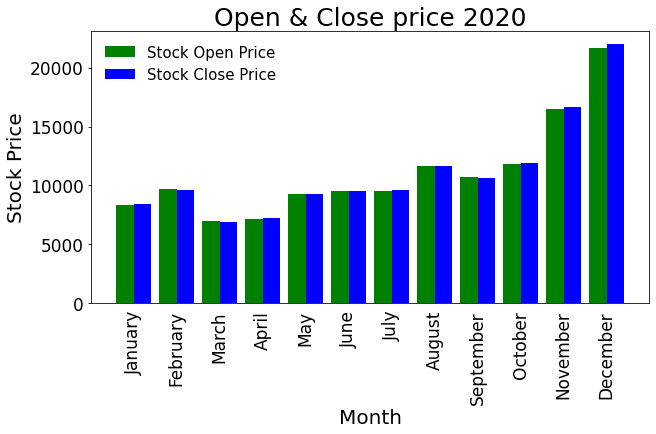

In [80]:
# Monthly Avg. open & close price 2020
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(open_close_2020))
width = 0.4
plt.bar(x-0.2, open_close_2020['Open'], width, color='green', label='Stock Open Price')
plt.bar(x+0.2, open_close_2020['Close'],width, color='blue', label='Stock Close Price')
plt.title('Open & Close price 2020', fontsize=25)
plt.xlabel('Month',fontsize=20)
plt.xticks(x, open_close_2020.index, fontsize=17,rotation = 'vertical')
plt.ylabel('Stock Price', fontsize=20)
plt.yticks(fontsize=17)
ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15)
plt.show()

In [81]:
Yr_2021 = train_data[(train_data['Date'] >= '2021-01-01') & (train_data['Date'] < '2022-01-01')]
Adj_close_2021= Yr_2021.groupby(Yr_2021['Date'].dt.strftime('%B'))[['Adj Close']].mean()
#new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Adj_close_2021 = Adj_close_2021.reindex(new_order,axis=0)
Adj_close_2021

,Adj Close
Date,
January,34761.649950
February,46306.798968
March,54998.008695
April,57206.720052
May,46443.286668
June,35845.154688
July,34444.973790
August,45709.022682
September,45939.771484


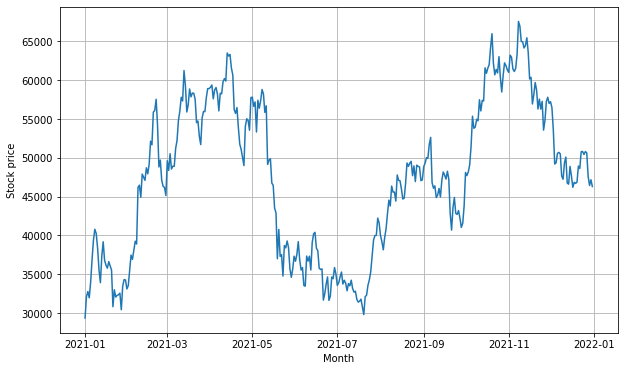

In [82]:
#stock analysis 2021
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Stock price')
plt.plot(Yr_2021['Adj Close'])
plt.show()

In [83]:
open_close_2021= Yr_2021.groupby(Yr_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
#new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
open_close_2021 = open_close_2021.reindex(new_order,axis=0)
open_close_2021

,Open,Close
Date,,
January,34652.961694,34761.649950
February,45874.967216,46306.798968
March,54544.678176,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154688
July,34234.212450,34444.973790
August,45516.119834,45709.022682
September,46041.859375,45939.771484


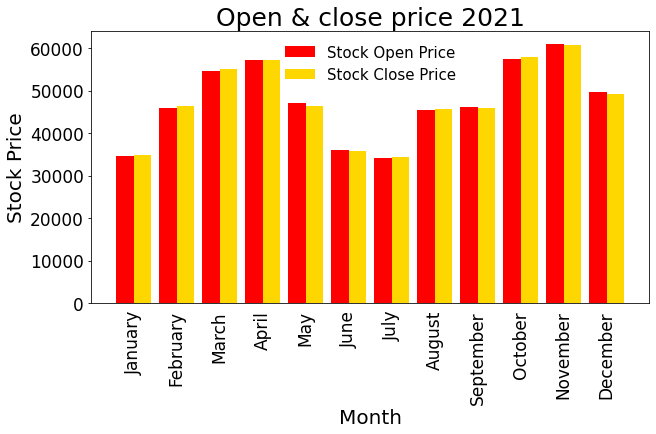

In [84]:
# Monthly Avg. open & close price 2020
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(open_close_2021))
width = 0.4
plt.bar(x-0.2, open_close_2021['Open'], width, color='red', label='Stock Open Price')
plt.bar(x+0.2, open_close_2021['Close'],width, color='gold', label='Stock Close Price')
plt.title('Open & close price 2021', fontsize=25)
plt.xlabel('Month',fontsize=20)
plt.xticks(x, open_close_2021.index, fontsize=17,rotation = 'vertical')
plt.ylabel('Stock Price', fontsize=20)
plt.yticks(fontsize=17)
ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15)
plt.show()

As we seen in these plots there is a storng decline in stock price during Covid peak time in 2020 and 2021

In [85]:
# Creating a new feature for better representing day-wise values
train_data['Mean_low_high'] = (train_data['Low'] + train_data['High'])/2

In [86]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean_low_high
Date,,,,,,,,
2016-01-01,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900,431.880509
2016-01-02,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,433.966003
2016-01-03,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,429.224502
2016-01-04,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,431.800506
2016-01-05,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,431.929001


In [87]:
#Splitting the Features and Target
X = train_data.drop(['Date','Close','Adj Close'],axis=1)
Y = train_data['Adj Close']

In [88]:
X.reset_index(drop=True, inplace=True)

In [89]:
X

,Open,High,Low,Volume,Mean_low_high
0,430.721008,436.246002,427.515015,36278900,431.880509
1,434.622009,436.062012,431.869995,30096600,433.966003
2,433.578003,433.743011,424.705994,39633800,429.224502
3,430.061005,434.516998,429.084015,38477500,431.800506
4,433.069000,434.182007,429.675995,34522600,431.929001
...,...,...,...,...,...
2188,50679.859375,50679.859375,47414.210938,33430376883,49047.035157
2189,47623.871094,48119.742188,46201.496094,30049226299,47160.619141
2190,46490.605469,47879.964844,46060.312500,26686491018,46970.138672
2191,47169.371094,48472.527344,45819.953125,36974172400,47146.240235


In [91]:
Y.reset_index(drop=True, inplace=True)

In [92]:
Y

0         434.334015
1         433.437988
2         430.010986
3         433.091003
4         431.959991
            ...     
2188    47588.855469
2189    46444.710938
2190    47178.125000
2191    46306.445313
2192    47686.812500
Name: Adj Close, Length: 2193, dtype: float64

In [93]:
#data standardisation
scaler = StandardScaler()
scaler.fit(X)
X_std= scaler.transform(X)


In [94]:
X_std

array([[-0.76322468, -0.76347907, -0.76383764, -0.84132148, -0.76385659],
       [-0.76298791, -0.76348994, -0.76356472, -0.84161803, -0.76372974],
       [-0.76305128, -0.7636269 , -0.76401368, -0.84116056, -0.76401815],
       ...,
       [ 2.03230928,  2.0386394 ,  2.09589589,  0.43700633,  2.06697029],
       [ 2.07350592,  2.07363729,  2.08083296,  0.93047443,  2.07768218],
       [ 2.02145369,  2.03552965,  2.11019506,  0.33609244,  2.07230853]])

In [95]:
#splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size = 0.2, random_state=2)

In [96]:
#Model Training: LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [97]:
Y_train_pred=model.predict(X_train)
print(Y_train_pred)

[  451.463548    6197.79440896 10638.28225348 ...  7516.00217722
  3819.50198108  9157.33728921]


In [98]:
Y_train

117       444.687012
923      6228.810059
1290    10256.058594
1616     9800.636719
365       963.742981
            ...     
1071     3419.937256
433      1188.489990
674      7407.410156
1099     3857.717529
1608     9181.017578
Name: Adj Close, Length: 1754, dtype: float64

In [99]:
#Model evaluation on training data
#R_2 score
error_score = r2_score(Y_train, Y_train_pred)
error_score

0.9995334401189993

In [100]:
#Mean squared error
mse=mean_squared_error(Y_train, Y_train_pred)
mse

123554.5908488913

In [101]:
mae=mean_absolute_error(Y_train, Y_train_pred)
mae

156.34486484829299

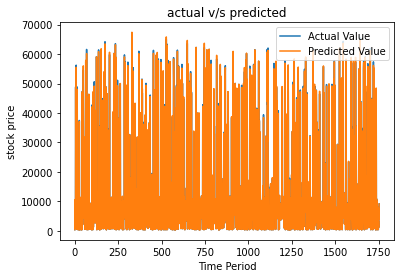

In [102]:
plt.plot(Y_train.values, label = 'Actual Value')
plt.plot(Y_train_pred, label = 'Predicted Value')
plt.title("actual v/s predicted")
plt.xlabel('Time Period')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [103]:
#model evaluation on test data
Y_test_pred=model.predict(X_test)
print(Y_test_pred)

[  611.91665195 62799.00981123  9125.10622927  6453.90339385
 16630.72780469 48274.0774379  47130.284855     574.74308364
 46282.32374588  7565.39726637  6499.08368976  3469.96022436
  8551.71380792   755.19449497  2588.87705766  8854.1796886
 56163.0967637  32834.66368709   966.78333294 54931.02158392
   460.4025002   1798.73491219  2388.39452788  6479.09765608
  4055.4845339   3535.69965015   632.68661712 11653.7175351
  3431.20971403 45867.23770183  8575.89472841  9012.85082141
 60959.35869776 10587.8001331   4329.01651807  3404.69719736
  7265.22554192  9124.92659958  8200.49609331 10823.04080381
  7755.2466791   3648.96505482  8191.30366228  8039.20259003
   868.93505954  4215.33920405 13122.33267381  3992.24971484
  6991.74150197  8066.17273321  7823.50809411  9258.35723486
  7176.15727133  5339.7320611  46276.21022859  9748.63098879
  9248.08633573  2761.49078442   622.5511278   9977.89848279
 13694.97656143 15447.98005852   445.63042946  8411.31941835
  4694.53538684 55121.5228

In [104]:
Y_test

278       612.510986
2137    63326.988281
1659     9151.392578
1031     6486.390137
1781    16716.111328
            ...     
1697    11774.595703
2070    48847.027344
391       917.585999
459      1133.250000
176       665.122986
Name: Adj Close, Length: 439, dtype: float64

In [106]:
#R_2 score
error_score = r2_score(Y_test,Y_test_pred)
error_score

0.9995902903756375

In [107]:
#Mean squared error
mse=mean_squared_error(Y_test, Y_test_pred)
mse

122669.6114542074

In [109]:
#mean absolute error
mae=mean_absolute_error(Y_test, Y_test_pred)
mae

153.4909687998403

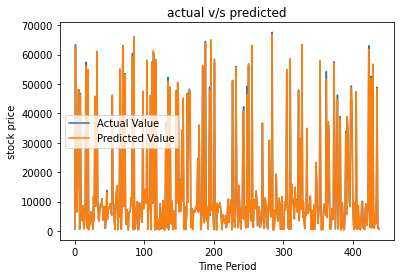

In [110]:
plt.plot(Y_test.values, label = 'Actual Value')
plt.plot(Y_test_pred, label = 'Predicted Value')
plt.title("actual v/s predicted")
plt.xlabel('Time Period')
plt.ylabel('stock price')
plt.legend()
plt.show()

checking model performance on Out of Time Testing data

In [111]:
#loading test data
ott_data=pd.read_csv("/content/BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv")

In [112]:
ott_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [113]:
ott_data.shape

(35, 7)

In [114]:
# Creating a new feature for better representing day-wise values
ott_data['Mean_low_high'] = (ott_data['Low'] + ott_data['High'])/2

In [115]:
ott_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean_low_high
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004,47057.898438
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547,47369.171875
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362,46673.345704
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905,46579.505860
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859,44863.634765


In [116]:
#Splitting the Features and Target
X_ott = ott_data.drop(['Date','Close','Adj Close'],axis=1)
Y_ott= ott_data['Adj Close']

In [117]:
X_ott.reset_index(drop=True, inplace=True)
X_ott

,Open,High,Low,Volume,Mean_low_high
0,46311.746094,47827.312500,46288.484375,24582667004,47057.898438
1,47680.925781,47881.406250,46856.937500,27951569547,47369.171875
2,47343.542969,47510.726563,45835.964844,33071628362,46673.345704
3,46458.851563,47406.546875,45752.464844,42494677905,46579.505860
4,45899.359375,46929.046875,42798.222656,36851084859,44863.634765
5,43565.511719,43748.718750,42645.539063,30208048289,43197.128907
6,43153.570313,43153.570313,41077.445313,84196607520,42115.507813
7,41561.464844,42228.941406,40672.277344,28066355845,41450.609375
8,41734.726563,42663.949219,41338.160156,21294384372,42001.054688
9,41910.230469,42199.484375,39796.570313,32104232331,40998.027344


In [118]:
Y_ott.reset_index(drop=True, inplace=True)
Y_ott

0     47686.812500
1     47345.218750
2     46458.117188
3     45897.574219
4     43569.003906
5     43160.929688
6     41557.902344
7     41733.941406
8     41911.601563
9     41821.261719
10    42735.855469
11    43949.101563
12    42591.570313
13    43099.699219
14    43177.398438
15    43113.878906
16    42250.550781
17    42375.632813
18    41744.328125
19    40680.417969
20    36457.316406
21    35030.250000
22    36276.804688
23    36654.328125
24    36954.003906
25    36852.121094
26    37138.234375
27    37784.332031
28    38138.179688
29    37917.601563
30    38483.125000
31    38743.273438
32    36952.984375
33    37154.601563
34    37649.335938
Name: Adj Close, dtype: float64

In [119]:
X_ott_std= scaler.transform(X_ott)

In [120]:
X_ott_std

array([[ 2.02145369,  2.03552965,  2.11019506,  0.33609244,  2.07230853],
       [ 2.10455395,  2.03872453,  2.14581909,  0.49768822,  2.09124266],
       [ 2.08407702,  2.01683147,  2.08183639,  0.74328152,  2.04891698],
       [ 2.03038203,  2.01067841,  2.07660358,  1.19527591,  2.04320889],
       [ 1.99642451,  1.98247633,  1.89146601,  0.9245703 ,  1.93883597],
       [ 1.85477521,  1.79463996,  1.88189757,  0.60592449,  1.83746583],
       [ 1.82977306,  1.75948933,  1.78362768,  3.19558782,  1.77167304],
       [ 1.73314266,  1.70487894,  1.75823645,  0.50319416,  1.73122863],
       [ 1.74365852,  1.73057135,  1.79996625,  0.17836374,  1.76471109],
       [ 1.75431046,  1.70313915,  1.70335731,  0.69687854,  1.70369899],
       [ 1.74880418,  1.75048746,  1.80432758,  0.41979379,  1.77708352],
       [ 1.80480434,  1.81747617,  1.87459352,  0.76382624,  1.84568058],
       [ 1.87791341,  1.82592525,  1.86945814,  1.44453381,  1.84753916],
       [ 1.79610644,  1.77089521,  1.8

In [121]:
ott_pred=model.predict(X_ott_std)
ott_pred

array([47462.25834909, 47124.60732343, 46298.48653494, 46662.0907561 ,
       44536.85891437, 42948.46298931, 41647.27767277, 41398.13066584,
       42129.9141663 , 40581.15700785, 42431.832871  , 43680.27542654,
       43082.45461486, 42683.20073447, 43193.37646707, 42914.52098005,
       42032.86102601, 41761.51244537, 41540.62290803, 42329.39275805,
       37543.85463437, 35104.64058024, 35970.01789846, 34915.11929749,
       36627.67493228, 38087.82580907, 36156.61446301, 37096.6004908 ,
       38085.70915855, 37620.62157766, 37613.7669873 , 38648.52260273,
       37377.48149126, 36605.88956072, 37786.24402782])

In [122]:
#model evaluation on test data
# R_2 score 
r2_score_test = r2_score(Y_ott, ott_pred)
r2_score_test

0.9610769390485393

In [123]:
#mean squared error
mse=mean_squared_error(Y_ott, ott_pred)
mse

455209.035248128

In [124]:
#mean absolute error
mae=mean_absolute_error(Y_ott, ott_pred)
mae

505.0080457238108

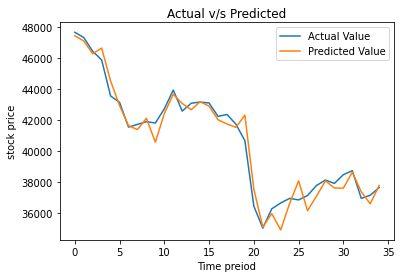

In [125]:
plt.plot(Y_ott, label = 'Actual Value')
plt.plot(ott_pred, label = 'Predicted Value')
plt.title("Actual v/s Predicted")
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend()
plt.show()